In [1]:
load('../Library/lotov.py')
load('../Library/polyFunctions.sage')

import numpy as np
import random

In [2]:
# generate a 3 dimensional polytope at random, circumscribed in the unit sphere
k = 80 # number of vertices
anglesTheta = [random.uniform(0, pi.n(digits=5)) for i in range(k)]
anglesPhi = [random.uniform(0, 2*pi.n(digits=5)) for i in range(k)]

vertices = list()
for i in range(k):
    v = [sin(anglesTheta[i])*cos(anglesPhi[i]), sin(anglesTheta[i])*sin(anglesPhi[i]), cos(anglesTheta[i])]
    vertices.append(v)
    
P = Polyhedron(vertices = vertices, base_ring=RDF)   
P.plot(alpha=0.4, color='green') + sphere((0,0,0), color='black', opacity=0.2, aspect_ratio=[1,1,1])

Graphics3d Object

In [3]:
# define the plane of projection
v1 = [1,0,0]; v2 = [0,1,0];

# compute H space representation
[A, b] = polytopeVtoH(P)
# obtain projection by Lotov Algorithm
err = 0.7; 
[oi, ui] = lotov_algo (A, b, v1, v2, err, rel = False)

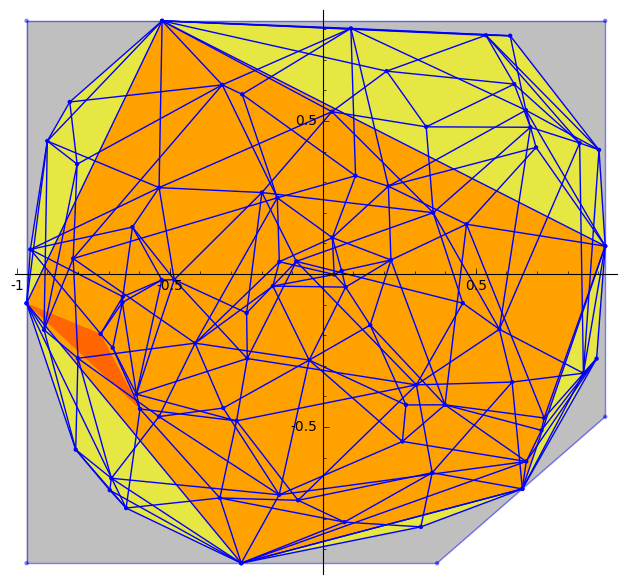

In [4]:
piOver = Polyhedron(vertices = oi, base_ring=RDF)
piUnder = Polyhedron(vertices = ui, base_ring=RDF)

exactProjection = P.projection(lambda x: [x[0],x[1]] ).plot(polygon_opts={'color':'yellow','alpha':0.4})
piOver.plot(alpha=0.5, fill='grey') + piUnder.plot(alpha=1, fill='red')+exactProjection

### Interact plot

*Exercise*. Generate an [interact](http://doc.sagemath.org/html/en/prep/Quickstarts/Interact.html) plot for varying error threshold. Compare the inner and outer projections obtained by the Lotov algorithm and the exact projection, check that for sufficiently small error, the results are the same. 

*Hint*: check this examples [sagemath interact wiki](https://wiki.sagemath.org/interact).

In [5]:
@interact
def logistic_bifs(err = slider(0.0,4.0,.0001,2.0)):
    [oi, ui] = lotov_algo (A, b, v1, v2, err, rel = False)
    
    piOver = Polyhedron(vertices = oi, base_ring=RDF)
    piUnder = Polyhedron(vertices = ui, base_ring=RDF)

    #exactProjection = P.projection(lambda x: [x[0],x[1]] ).plot(polygon_opts={'color':'yellow','alpha':0.4})
    myPlot = Graphics()
    myPlot = piOver.plot(alpha=0.5, fill='grey') + piUnder.plot(alpha=1, fill='red')+exactProjection
    
    show(myPlot, figsize = [6,6])

NameError: name 'slider' is not defined